In [96]:
import pandas as pd
#settings :
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [97]:
train = pd.read_csv('/content/drive/MyDrive/database_house/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [98]:
# dropping column MSSubClass
train.drop('MSSubClass', axis=1, inplace=True)

In [99]:
#Converting MSZoning to numerical values
train['MSZoning'] = train['MSZoning'].map({'RL': 0, 'RM': 1, 'C (all)': 2, 'FV': 3, 'RH': 4})

In [100]:
#train['LotFrontage'].fillna(train.groupby(['LotArea'])['LotFrontage'].transform('mean'),inplace=True)
train['LotFrontage'] = train['LotFrontage'].fillna(method='ffill')

In [101]:
#Converting Street to numerical values
train['Street'] = train['Street'].map({'Pave': 0, 'Grvl': 1})

In [102]:
#Alley drop
train.drop('Alley', axis=1, inplace=True)

In [103]:
#LandContour drop
train.drop('LandContour', axis=1, inplace=True)

In [104]:
#Utilities drop
train.drop('Utilities', axis=1, inplace=True)

In [105]:
#LotConfig drop
train.drop('LotConfig', axis=1, inplace=True)

In [106]:
#LandSlope drop
train.drop('LandSlope', axis=1, inplace=True)


In [107]:
#Neighborhood convert to numerical values
train['Neighborhood'] = train['Neighborhood'].map({'CollgCr': 0, 'Veenker': 1, 'Crawfor': 2, 'NoRidge': 3, 'Mitchel': 4, 'Somerst': 5, 'NWAmes': 6, 'OldTown': 7, 'BrkSide': 8, 'Sawyer': 9, 'NridgHt': 10, 'NAmes': 11, 'SawyerW': 12, 'IDOTRR': 13, 'MeadowV': 14, 'Edwards': 15, 'Timber': 16, 'Gilbert': 17, 'StoneBr': 18, 'ClearCr': 19, 'NPkVill': 20, 'Blmngtn': 21, 'BrDale': 22, 'SWISU': 23, 'Blueste': 24})


In [108]:
#Condition1 to numerical values
train['Condition1'] = train['Condition1'].map({'Norm': 0, 'Feedr': 1, 'PosN': 2, 'Artery': 3, 'RRAe': 4, 'RRNn': 5, 'RRAn': 6, 'PosA': 7, 'RRNe': 8})


In [109]:
#Condition2 to DROP
train.drop('Condition2', axis=1, inplace=True)

In [110]:
#BldgType to numerical values
train['BldgType'] = train['BldgType'].map({'1Fam': 0, '2fmCon': 1, 'Duplex': 2, 'TwnhsE': 3, 'Twnhs': 4})

In [111]:
#HouseStyle DROP
train.drop('HouseStyle', axis=1, inplace=True)

In [112]:
#RoofStyle Convert to numerical values
train['RoofStyle'] = train['RoofStyle'].map({'Gable': 0, 'Hip': 1, 'Gambrel': 2, 'Mansard': 3, 'Flat': 4, 'Shed': 5})


In [113]:
#RoofMatl Convert to numerical values
train['RoofMatl'] = train['RoofMatl'].map({'CompShg': 0, 'WdShngl': 1, 'Metal': 2, 'WdShake': 3, 'Membran': 4, 'Tar&Grv': 5, 'Roll': 6, 'ClyTile': 7})


In [114]:
#Exterior1st Convert to numerical values
train['Exterior1st'] = train['Exterior1st'].map({'VinylSd': 0, 'MetalSd': 1, 'Wd Sdng': 2, 'HdBoard': 3, 'BrkFace': 4, 'WdShing': 5, 'CemntBd': 6, 'Plywood': 7, 'AsbShng': 8, 'Stucco': 9, 'BrkComm': 10, 'AsphShn': 11, 'Stone': 12, 'ImStucc': 13, 'CBlock': 14})


In [115]:
#Exterior2nd drop
train.drop('Exterior2nd', axis=1, inplace=True)

In [116]:
#MasVnrType drop
train.drop('MasVnrType', axis=1, inplace=True)

In [117]:
#MasVnrArea drop
train.drop('MasVnrArea', axis=1, inplace=True)

In [118]:
#ExterQual Convert to numerical values
train['ExterQual'] = train['ExterQual'].map({'Gd': 0, 'TA': 1, 'Ex': 2, 'Fa': 3})

In [119]:
#ExterCond Convert to numerical values
train['ExterCond'] = train['ExterCond'].map({'TA': 0, 'Gd': 1, 'Fa': 2, 'Po': 3, 'Ex': 4})


In [120]:
#BsmtQual drop
train.drop('BsmtQual', axis=1, inplace=True)

In [121]:
#BsmtCond drop
train.drop('BsmtCond', axis=1, inplace=True)

In [122]:
#BsmtExposure drop
train.drop('BsmtExposure', axis=1, inplace=True)

In [123]:
#BsmtFinType1 drop
train.drop('BsmtFinType1', axis=1, inplace=True)

In [124]:
#BsmtFinSF1 drop
train.drop('BsmtFinSF1', axis=1, inplace=True)

In [125]:
#BsmtFinType2 drop
train.drop('BsmtFinType2', axis=1, inplace=True)

In [126]:
#BsmtFinSF2 drop
train.drop('BsmtFinSF2', axis=1, inplace=True)

In [127]:
#BsmtUnfSF drop
train.drop('BsmtUnfSF', axis=1, inplace=True)

In [128]:
#TotalBsmtSF drop
train.drop('TotalBsmtSF', axis=1, inplace=True)

In [129]:
#Heating Convert to numerical values
train['Heating'] = train['Heating'].map({'GasA': 0, 'GasW': 1, 'Grav': 2, 'Wall': 3, 'OthW': 4, 'Floor': 5})


In [130]:
#HeatingQC Convert to numerical values
train['HeatingQC'] = train['HeatingQC'].map({'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4})

In [131]:
#CentralAir Convert to numerical values
train['CentralAir'] = train['CentralAir'].map({'Y': 1, 'N': 0})

In [132]:
#Electrical convert to numerical values
train['Electrical'] = train['Electrical'].map({'SBrkr': 0, 'FuseF': 1, 'FuseA': 2, 'FuseP': 3, 'Mix': 4})


In [133]:
train['Electrical'] = train['Electrical'].fillna(method='ffill')

In [134]:
#1stFlrSF drop
train.drop('1stFlrSF', axis=1, inplace=True)

In [135]:
#2ndFlrSF drop
train.drop('2ndFlrSF', axis=1, inplace=True)

In [136]:
#LowQualFinSF drop
train.drop('LowQualFinSF', axis=1, inplace=True)

In [137]:
#BsmtFullBath drop
train.drop('BsmtFullBath', axis=1, inplace=True)

In [138]:
#BsmtHalfBath drop
train.drop('BsmtHalfBath', axis=1, inplace=True)

In [139]:
#KitchenQual Convert to numerical values
train['KitchenQual'] = train['KitchenQual'].map({'Gd': 0, 'TA': 1, 'Ex': 2, 'Fa': 3})

In [140]:
#Functional Convert to numerical values
train['Functional'] = train['Functional'].map({'Typ': 0, 'Min1': 1, 'Min2': 2, 'Mod': 3, 'Maj1': 4, 'Maj2': 5, 'Sev': 6, 'Sal': 7})


In [141]:
#FireplaceQu drop
train.drop('FireplaceQu', axis=1, inplace=True)

In [142]:
#GarageType convert to numerical values
train['GarageType'] = train['GarageType'].map({'Attchd': 0, 'Detchd': 1, 'BuiltIn': 2, 'CarPort': 3, 'Basment': 4, '2Types': 5})


In [143]:
train['GarageType'] = train['GarageType'].fillna(method='ffill')

In [144]:
#GarageYrBlt drop
train.drop('GarageYrBlt', axis=1, inplace=True)

In [145]:
#GarageFinish drop 
train.drop('GarageFinish', axis=1, inplace=True)

In [146]:
#GarageQual drop
train.drop('GarageQual', axis=1, inplace=True)
#GarageCond drop
train.drop('GarageCond', axis=1, inplace=True)


In [147]:
#PavedDrive Convert to numerical values
train['PavedDrive'] = train['PavedDrive'].map({'Y': 0, 'N': 1, 'P': 2})

In [148]:
#WoodDeckSF drop
train.drop('WoodDeckSF', axis=1, inplace=True)

In [149]:
#3SsnPorch drop
train.drop('3SsnPorch', axis=1, inplace=True)
#ScreenPorch drop
train.drop('ScreenPorch', axis=1, inplace=True)

In [150]:
#PoolQC drop
train.drop('PoolQC', axis=1, inplace=True)
#Fence drop
train.drop('Fence', axis=1, inplace=True)

In [151]:
#MiscFeature drop
train.drop('MiscFeature', axis=1, inplace=True)


In [152]:
#MiscVal drop
train.drop('MiscVal', axis=1, inplace=True)


In [153]:
#SaleType drop
train.drop('SaleType', axis=1, inplace=True)

In [154]:
#SaleCondition convert to numerical values
train['SaleCondition'] = train['SaleCondition'].map({'Normal': 0, 'Abnorml': 1, 'Partial': 2, 'AdjLand': 3, 'Alloca': 4, 'Family': 5})


In [155]:
train.Foundation.value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [156]:
#Foundation convert to numerical values
train['Foundation'] = train['Foundation'].map({'PConc': 0, 'CBlock': 1, 'BrkTil': 2, 'Slab': 3, 'Stone': 4, 'Wood': 5})

In [157]:
train.head()

,Id,MSZoning,LotFrontage,LotArea,Street,LotShape,Neighborhood,Condition1,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,Electrical,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageCars,GarageArea,PavedDrive,OpenPorchSF,EnclosedPorch,PoolArea,MoSold,YrSold,SaleCondition,SalePrice
0,1,0,65.0,8450,0,Reg,0,0,0,7,5,2003,2003,0,0,0,0,0,0,0,0,1,0.0,1710,2,1,3,1,0,8,0,0,0.0,2,548,0,61,0,0,2,2008,0,208500
1,2,0,80.0,9600,0,Reg,1,1,0,6,8,1976,1976,0,0,1,1,0,1,0,0,1,0.0,1262,2,0,3,1,1,6,0,1,0.0,2,460,0,0,0,0,5,2007,0,181500
2,3,0,68.0,11250,0,IR1,0,0,0,7,5,2001,2002,0,0,0,0,0,0,0,0,1,0.0,1786,2,1,3,1,0,6,0,1,0.0,2,608,0,42,0,0,9,2008,0,223500
3,4,0,60.0,9550,0,IR1,2,0,0,7,5,1915,1970,0,0,2,1,0,2,0,1,1,0.0,1717,1,0,3,1,0,7,0,1,1.0,3,642,0,35,272,0,2,2006,1,140000
4,5,0,84.0,14260,0,IR1,3,0,0,8,5,2000,2000,0,0,0,0,0,0,0,0,1,0.0,2198,2,1,4,1,0,9,0,1,0.0,3,836,0,84,0,0,12,2008,0,250000


In [158]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   Neighborhood   1460 non-null   int64  
 7   Condition1     1460 non-null   int64  
 8   BldgType       1460 non-null   int64  
 9   OverallQual    1460 non-null   int64  
 10  OverallCond    1460 non-null   int64  
 11  YearBuilt      1460 non-null   int64  
 12  YearRemodAdd   1460 non-null   int64  
 13  RoofStyle      1460 non-null   int64  
 14  RoofMatl       1460 non-null   int64  
 15  Exterior1st    1460 non-null   int64  
 16  ExterQual      1460 non-null   int64  
 17  ExterCond      1460 non-null   int64  
 18  Foundati

In [159]:
def remove_interquartile(data):
  Q1= data.quantile(0.25)
  Q3= data.quantile(0.75)  
  IQ_range= Q3-Q1
  data_clean= data[~((data<(Q1 - 3*IQ_range)) | (data>(Q3 + 3*IQ_range)))]
  return data_clean

train = remove_interquartile(train)

<ipython-input-159-c6e9f2ebc708>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_clean= data[~((data<(Q1 - 3*IQ_range)) | (data>(Q3 + 3*IQ_range)))]


In [160]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSZoning       1151 non-null   float64
 2   LotFrontage    1447 non-null   float64
 3   LotArea        1426 non-null   float64
 4   Street         1454 non-null   float64
 5   LotShape       1460 non-null   object 
 6   Neighborhood   1460 non-null   int64  
 7   Condition1     1260 non-null   float64
 8   BldgType       1220 non-null   float64
 9   OverallQual    1460 non-null   int64  
 10  OverallCond    1459 non-null   float64
 11  YearBuilt      1460 non-null   int64  
 12  YearRemodAdd   1460 non-null   int64  
 13  RoofStyle      1141 non-null   float64
 14  RoofMatl       1434 non-null   float64
 15  Exterior1st    1458 non-null   float64
 16  ExterQual      1460 non-null   int64  
 17  ExterCond      1282 non-null   float64
 18  Foundati

In [161]:
train.fillna(method='ffill').values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSZoning       1151 non-null   float64
 2   LotFrontage    1447 non-null   float64
 3   LotArea        1426 non-null   float64
 4   Street         1454 non-null   float64
 5   LotShape       1460 non-null   object 
 6   Neighborhood   1460 non-null   int64  
 7   Condition1     1260 non-null   float64
 8   BldgType       1220 non-null   float64
 9   OverallQual    1460 non-null   int64  
 10  OverallCond    1459 non-null   float64
 11  YearBuilt      1460 non-null   int64  
 12  YearRemodAdd   1460 non-null   int64  
 13  RoofStyle      1141 non-null   float64
 14  RoofMatl       1434 non-null   float64
 15  Exterior1st    1458 non-null   float64
 16  ExterQual      1460 non-null   int64  
 17  ExterCond      1282 non-null   float64
 18  Foundati

In [162]:
train[['col1', 'col2']] = df[['col1', 'col2']].fillna(df[['col1', 'col2']].median())

NameError: ignored

In [163]:
column_names = train.columns.values.tolist()
print(column_names)

['Id', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'Neighborhood', 'Condition1', 'BldgType', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageCars', 'GarageArea', 'PavedDrive', 'OpenPorchSF', 'EnclosedPorch', 'PoolArea', 'MoSold', 'YrSold', 'SaleCondition', 'SalePrice']


In [164]:
#refill NANs

In [165]:
train[['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Neighborhood', 'Condition1', 'BldgType', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageCars', 'GarageArea', 'PavedDrive', 'OpenPorchSF', 'EnclosedPorch', 'PoolArea', 'MoSold', 'YrSold', 'SaleCondition', 'SalePrice']]=train[[ 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Neighborhood', 'Condition1', 'BldgType', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageCars', 'GarageArea', 'PavedDrive', 'OpenPorchSF', 'EnclosedPorch', 'PoolArea', 'MoSold', 'YrSold', 'SaleCondition', 'SalePrice']].fillna(train[['Id', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Neighborhood', 'Condition1', 'BldgType', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageCars', 'GarageArea', 'PavedDrive', 'OpenPorchSF', 'EnclosedPorch', 'PoolArea', 'MoSold', 'YrSold', 'SaleCondition', 'SalePrice']].median())

In [166]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSZoning       1460 non-null   float64
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   float64
 5   LotShape       1460 non-null   object 
 6   Neighborhood   1460 non-null   int64  
 7   Condition1     1460 non-null   float64
 8   BldgType       1460 non-null   float64
 9   OverallQual    1460 non-null   int64  
 10  OverallCond    1460 non-null   float64
 11  YearBuilt      1460 non-null   int64  
 12  YearRemodAdd   1460 non-null   int64  
 13  RoofStyle      1460 non-null   float64
 14  RoofMatl       1460 non-null   float64
 15  Exterior1st    1460 non-null   float64
 16  ExterQual      1460 non-null   int64  
 17  ExterCond      1460 non-null   float64
 18  Foundati

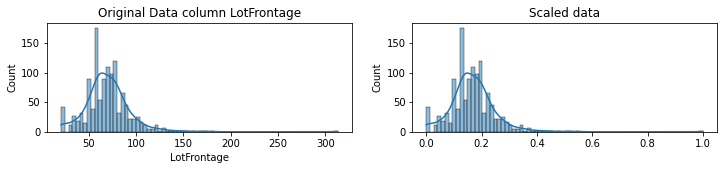

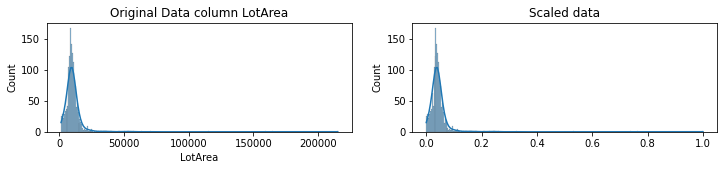

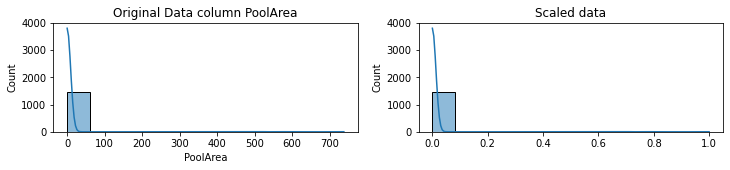

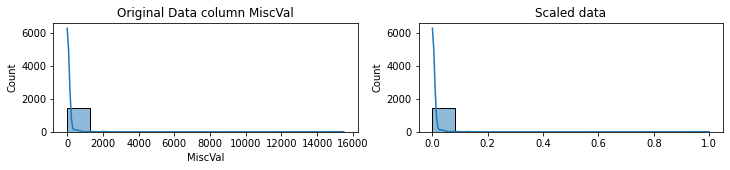

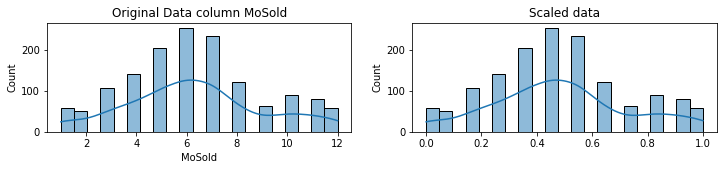

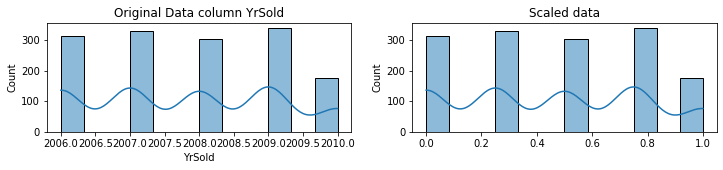

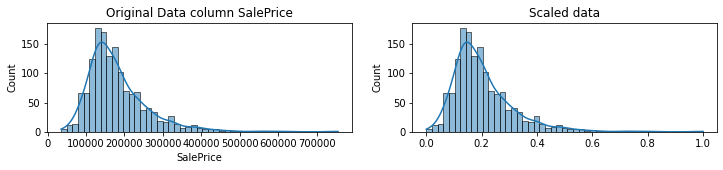

In [167]:
#SCALING
import  pandas  as  pd 
#settings : 
pd.set_option ( 'display.max_rows' ,  1000 ) 
pd.set_option ( 'display.max_columns' ,  500 ) 
pd.set_option ( 'display.width' ,  1000 ) 
pd.set_option ( 'display.max_colwidth' ,  1000 )
import  numpy  as  np 
import  matplotlib.pyplot  as  plt 
import  seaborn  as  sns
import missingno as msno 
import datatable as dt # pip install datatable    

from scipy import stats
from sklearn.preprocessing import minmax_scale
def plot_scale_and_original(original_data, column_to_plot)->None:
    """Plot the column of dataframe scaling and original
    """
    # mix-max scale the data between 0 and 1
    scaled_data = minmax_scale(original_data[column_to_plot])
    #____________plot started here_________________
    fig, ax = plt.subplots(1, 2, figsize=(12, 2))
    sns.histplot(original_data[column_to_plot], ax=ax[0], kde=True, legend=False)
    ax[0].set_title(f"Original Data column {column_to_plot}")
    sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
    ax[1].set_title("Scaled data")
    plt.show()

data = pd.read_csv("/content/drive/MyDrive/database_house/train.csv")
plot_scale_and_original(data, 'LotFrontage')
plot_scale_and_original(data, 'LotArea')
plot_scale_and_original(data, 'PoolArea')
plot_scale_and_original(data, 'MiscVal')
plot_scale_and_original(data, 'MoSold')
plot_scale_and_original(data, 'YrSold')
plot_scale_and_original(data, 'SalePrice')

# TEST DATA


In [172]:
test = pd.read_csv('/content/drive/MyDrive/database_house/test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [173]:
# dropping column MSSubClass
test.drop('MSSubClass', axis=1, inplace=True)

In [174]:
#Converting MSZoning to numerical values
test['MSZoning'] = test['MSZoning'].map({'RL': 0, 'RM': 1, 'C (all)': 2, 'FV': 3, 'RH': 4})

In [175]:
#test['LotFrontage'].fillna(test.groupby(['LotArea'])['LotFrontage'].transform('mean'),inplace=True)
test['LotFrontage'] = test['LotFrontage'].fillna(method='ffill')

In [176]:
#Converting Street to numerical values
test['Street'] = test['Street'].map({'Pave': 0, 'Grvl': 1})

In [177]:
#Alley drop
test.drop('Alley', axis=1, inplace=True)

In [178]:
#LandContour drop
test.drop('LandContour', axis=1, inplace=True)

In [179]:
#Utilities drop
test.drop('Utilities', axis=1, inplace=True)

In [180]:
#LotConfig drop
test.drop('LotConfig', axis=1, inplace=True)

In [181]:
#LandSlope drop
test.drop('LandSlope', axis=1, inplace=True)


In [182]:
#Neighborhood convert to numerical values
test['Neighborhood'] = test['Neighborhood'].map({'CollgCr': 0, 'Veenker': 1, 'Crawfor': 2, 'NoRidge': 3, 'Mitchel': 4, 'Somerst': 5, 'NWAmes': 6, 'OldTown': 7, 'BrkSide': 8, 'Sawyer': 9, 'NridgHt': 10, 'NAmes': 11, 'SawyerW': 12, 'IDOTRR': 13, 'MeadowV': 14, 'Edwards': 15, 'Timber': 16, 'Gilbert': 17, 'StoneBr': 18, 'ClearCr': 19, 'NPkVill': 20, 'Blmngtn': 21, 'BrDale': 22, 'SWISU': 23, 'Blueste': 24})


In [183]:
#Condition1 to numerical values
test['Condition1'] = test['Condition1'].map({'Norm': 0, 'Feedr': 1, 'PosN': 2, 'Artery': 3, 'RRAe': 4, 'RRNn': 5, 'RRAn': 6, 'PosA': 7, 'RRNe': 8})


In [184]:
#Condition2 to DROP
test.drop('Condition2', axis=1, inplace=True)

In [185]:
#BldgType to numerical values
test['BldgType'] = test['BldgType'].map({'1Fam': 0, '2fmCon': 1, 'Duplex': 2, 'TwnhsE': 3, 'Twnhs': 4})

In [186]:
#HouseStyle DROP
test.drop('HouseStyle', axis=1, inplace=True)

In [187]:
#RoofStyle Convert to numerical values
test['RoofStyle'] = test['RoofStyle'].map({'Gable': 0, 'Hip': 1, 'Gambrel': 2, 'Mansard': 3, 'Flat': 4, 'Shed': 5})


In [188]:
#RoofMatl Convert to numerical values
test['RoofMatl'] = test['RoofMatl'].map({'CompShg': 0, 'WdShngl': 1, 'Metal': 2, 'WdShake': 3, 'Membran': 4, 'Tar&Grv': 5, 'Roll': 6, 'ClyTile': 7})


In [189]:
#Exterior1st Convert to numerical values
test['Exterior1st'] = test['Exterior1st'].map({'VinylSd': 0, 'MetalSd': 1, 'Wd Sdng': 2, 'HdBoard': 3, 'BrkFace': 4, 'WdShing': 5, 'CemntBd': 6, 'Plywood': 7, 'AsbShng': 8, 'Stucco': 9, 'BrkComm': 10, 'AsphShn': 11, 'Stone': 12, 'ImStucc': 13, 'CBlock': 14})


In [190]:
#Exterior2nd drop
test.drop('Exterior2nd', axis=1, inplace=True)

In [191]:
#MasVnrType drop
test.drop('MasVnrType', axis=1, inplace=True)

In [192]:
#MasVnrArea drop
test.drop('MasVnrArea', axis=1, inplace=True)

In [193]:
#ExterQual Convert to numerical values
test['ExterQual'] = test['ExterQual'].map({'Gd': 0, 'TA': 1, 'Ex': 2, 'Fa': 3})

In [194]:
#ExterCond Convert to numerical values
test['ExterCond'] = test['ExterCond'].map({'TA': 0, 'Gd': 1, 'Fa': 2, 'Po': 3, 'Ex': 4})


In [195]:
#BsmtQual drop
test.drop('BsmtQual', axis=1, inplace=True)

In [196]:
#BsmtCond drop
test.drop('BsmtCond', axis=1, inplace=True)

In [197]:
#BsmtExposure drop
test.drop('BsmtExposure', axis=1, inplace=True)

In [198]:
#BsmtFinType1 drop
test.drop('BsmtFinType1', axis=1, inplace=True)

In [199]:
#BsmtFinSF1 drop
test.drop('BsmtFinSF1', axis=1, inplace=True)

In [200]:
#BsmtFinType2 drop
test.drop('BsmtFinType2', axis=1, inplace=True)

In [201]:
#BsmtFinSF2 drop
test.drop('BsmtFinSF2', axis=1, inplace=True)

In [202]:
#BsmtUnfSF drop
test.drop('BsmtUnfSF', axis=1, inplace=True)

In [203]:
#TotalBsmtSF drop
test.drop('TotalBsmtSF', axis=1, inplace=True)

In [204]:
#Heating Convert to numerical values
test['Heating'] = test['Heating'].map({'GasA': 0, 'GasW': 1, 'Grav': 2, 'Wall': 3, 'OthW': 4, 'Floor': 5})


In [205]:
#HeatingQC Convert to numerical values
test['HeatingQC'] = test['HeatingQC'].map({'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4})

In [206]:
#CentralAir Convert to numerical values
test['CentralAir'] = test['CentralAir'].map({'Y': 1, 'N': 0})

In [207]:
#Electrical convert to numerical values
test['Electrical'] = test['Electrical'].map({'SBrkr': 0, 'FuseF': 1, 'FuseA': 2, 'FuseP': 3, 'Mix': 4})


In [208]:
test['Electrical'] = test['Electrical'].fillna(method='ffill')

In [209]:
#1stFlrSF drop
test.drop('1stFlrSF', axis=1, inplace=True)

In [210]:
#2ndFlrSF drop
test.drop('2ndFlrSF', axis=1, inplace=True)

In [211]:
#LowQualFinSF drop
test.drop('LowQualFinSF', axis=1, inplace=True)

In [212]:
#BsmtFullBath drop
test.drop('BsmtFullBath', axis=1, inplace=True)

In [213]:
#BsmtHalfBath drop
test.drop('BsmtHalfBath', axis=1, inplace=True)

In [214]:
#KitchenQual Convert to numerical values
test['KitchenQual'] = test['KitchenQual'].map({'Gd': 0, 'TA': 1, 'Ex': 2, 'Fa': 3})

In [215]:
#Functional Convert to numerical values
test['Functional'] = test['Functional'].map({'Typ': 0, 'Min1': 1, 'Min2': 2, 'Mod': 3, 'Maj1': 4, 'Maj2': 5, 'Sev': 6, 'Sal': 7})


In [216]:
#FireplaceQu drop
test.drop('FireplaceQu', axis=1, inplace=True)

In [217]:
#GarageType convert to numerical values
test['GarageType'] = test['GarageType'].map({'Attchd': 0, 'Detchd': 1, 'BuiltIn': 2, 'CarPort': 3, 'Basment': 4, '2Types': 5})


In [218]:
test['GarageType'] = test['GarageType'].fillna(method='ffill')

In [219]:
#GarageYrBlt drop
test.drop('GarageYrBlt', axis=1, inplace=True)

In [220]:
#GarageFinish drop 
test.drop('GarageFinish', axis=1, inplace=True)

In [221]:
#GarageQual drop
test.drop('GarageQual', axis=1, inplace=True)
#GarageCond drop
test.drop('GarageCond', axis=1, inplace=True)


In [222]:
#PavedDrive Convert to numerical values
test['PavedDrive'] = test['PavedDrive'].map({'Y': 0, 'N': 1, 'P': 2})

In [223]:
#WoodDeckSF drop
test.drop('WoodDeckSF', axis=1, inplace=True)

In [224]:
#3SsnPorch drop
test.drop('3SsnPorch', axis=1, inplace=True)
#ScreenPorch drop
test.drop('ScreenPorch', axis=1, inplace=True)

In [225]:
#PoolQC drop
test.drop('PoolQC', axis=1, inplace=True)
#Fence drop
test.drop('Fence', axis=1, inplace=True)

In [226]:
#MiscFeature drop
test.drop('MiscFeature', axis=1, inplace=True)


In [227]:
#MiscVal drop
test.drop('MiscVal', axis=1, inplace=True)


In [228]:
#SaleType drop
test.drop('SaleType', axis=1, inplace=True)

In [229]:
#SaleCondition convert to numerical values
test['SaleCondition'] = test['SaleCondition'].map({'Normal': 0, 'Abnorml': 1, 'Partial': 2, 'AdjLand': 3, 'Alloca': 4, 'Family': 5})


In [230]:
test.Foundation.value_counts()

PConc     661
CBlock    601
BrkTil    165
Slab       25
Stone       5
Wood        2
Name: Foundation, dtype: int64

In [231]:
#Foundation convert to numerical values
test['Foundation'] = test['Foundation'].map({'PConc': 0, 'CBlock': 1, 'BrkTil': 2, 'Slab': 3, 'Stone': 4, 'Wood': 5})

In [232]:
test.head()

,Id,MSZoning,LotFrontage,LotArea,Street,LotShape,Neighborhood,Condition1,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,Electrical,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageCars,GarageArea,PavedDrive,OpenPorchSF,EnclosedPorch,PoolArea,MoSold,YrSold,SaleCondition
0,1461,4.0,80.0,11622,0,Reg,11,1,0,5,6,1961,1961,0,0,0.0,1,0,1,0,2,1,0,896,1,0,2,1,1.0,5,0.0,0,0.0,1.0,730.0,0,0,0,0,6,2010,0
1,1462,0.0,81.0,14267,0,IR1,11,0,0,6,6,1958,1958,1,0,2.0,1,0,1,0,2,1,0,1329,1,1,3,1,0.0,6,0.0,0,0.0,1.0,312.0,0,36,0,0,6,2010,0
2,1463,0.0,74.0,13830,0,IR1,17,0,0,5,5,1997,1998,0,0,0.0,1,0,0,0,1,1,0,1629,2,1,3,1,1.0,6,0.0,1,0.0,2.0,482.0,0,34,0,0,3,2010,0
3,1464,0.0,78.0,9978,0,IR1,17,0,0,6,6,1998,1998,0,0,0.0,1,0,0,0,0,1,0,1604,2,1,3,1,0.0,7,0.0,1,0.0,2.0,470.0,0,36,0,0,6,2010,0
4,1465,0.0,43.0,5005,0,IR1,18,0,3,8,5,1992,1992,0,0,3.0,0,0,0,0,0,1,0,1280,2,0,2,1,0.0,5,0.0,0,0.0,2.0,506.0,0,82,0,0,1,2010,0


In [233]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 42 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSZoning       1455 non-null   float64
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   int64  
 5   LotShape       1459 non-null   object 
 6   Neighborhood   1459 non-null   int64  
 7   Condition1     1459 non-null   int64  
 8   BldgType       1459 non-null   int64  
 9   OverallQual    1459 non-null   int64  
 10  OverallCond    1459 non-null   int64  
 11  YearBuilt      1459 non-null   int64  
 12  YearRemodAdd   1459 non-null   int64  
 13  RoofStyle      1459 non-null   int64  
 14  RoofMatl       1459 non-null   int64  
 15  Exterior1st    1458 non-null   float64
 16  ExterQual      1459 non-null   int64  
 17  ExterCond      1459 non-null   int64  
 18  Foundati

In [234]:
def remove_interquartile(data):
  Q1= data.quantile(0.25)
  Q3= data.quantile(0.75)  
  IQ_range= Q3-Q1
  data_clean= data[~((data<(Q1 - 3*IQ_range)) | (data>(Q3 + 3*IQ_range)))]
  return data_clean

test = remove_interquartile(test)

<ipython-input-234-4cfd6a5fd7b5>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_clean= data[~((data<(Q1 - 3*IQ_range)) | (data>(Q3 + 3*IQ_range)))]


In [235]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 42 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSZoning       1114 non-null   float64
 2   LotFrontage    1450 non-null   float64
 3   LotArea        1440 non-null   float64
 4   Street         1453 non-null   float64
 5   LotShape       1459 non-null   object 
 6   Neighborhood   1459 non-null   int64  
 7   Condition1     1251 non-null   float64
 8   BldgType       1205 non-null   float64
 9   OverallQual    1459 non-null   int64  
 10  OverallCond    1453 non-null   float64
 11  YearBuilt      1459 non-null   int64  
 12  YearRemodAdd   1459 non-null   int64  
 13  RoofStyle      1169 non-null   float64
 14  RoofMatl       1442 non-null   float64
 15  Exterior1st    1457 non-null   float64
 16  ExterQual      1459 non-null   int64  
 17  ExterCond      1256 non-null   float64
 18  Foundati

In [236]:
test.fillna(method='ffill').values
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 42 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSZoning       1114 non-null   float64
 2   LotFrontage    1450 non-null   float64
 3   LotArea        1440 non-null   float64
 4   Street         1453 non-null   float64
 5   LotShape       1459 non-null   object 
 6   Neighborhood   1459 non-null   int64  
 7   Condition1     1251 non-null   float64
 8   BldgType       1205 non-null   float64
 9   OverallQual    1459 non-null   int64  
 10  OverallCond    1453 non-null   float64
 11  YearBuilt      1459 non-null   int64  
 12  YearRemodAdd   1459 non-null   int64  
 13  RoofStyle      1169 non-null   float64
 14  RoofMatl       1442 non-null   float64
 15  Exterior1st    1457 non-null   float64
 16  ExterQual      1459 non-null   int64  
 17  ExterCond      1256 non-null   float64
 18  Foundati

In [238]:
column_names = test.columns.values.tolist()
print(column_names)

['Id', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'Neighborhood', 'Condition1', 'BldgType', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageCars', 'GarageArea', 'PavedDrive', 'OpenPorchSF', 'EnclosedPorch', 'PoolArea', 'MoSold', 'YrSold', 'SaleCondition']


In [239]:
#refill NANs

In [241]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 42 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSZoning       1114 non-null   float64
 2   LotFrontage    1450 non-null   float64
 3   LotArea        1440 non-null   float64
 4   Street         1453 non-null   float64
 5   LotShape       1459 non-null   object 
 6   Neighborhood   1459 non-null   int64  
 7   Condition1     1251 non-null   float64
 8   BldgType       1205 non-null   float64
 9   OverallQual    1459 non-null   int64  
 10  OverallCond    1453 non-null   float64
 11  YearBuilt      1459 non-null   int64  
 12  YearRemodAdd   1459 non-null   int64  
 13  RoofStyle      1169 non-null   float64
 14  RoofMatl       1442 non-null   float64
 15  Exterior1st    1457 non-null   float64
 16  ExterQual      1459 non-null   int64  
 17  ExterCond      1256 non-null   float64
 18  Foundati

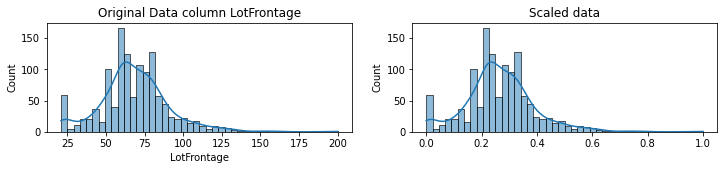

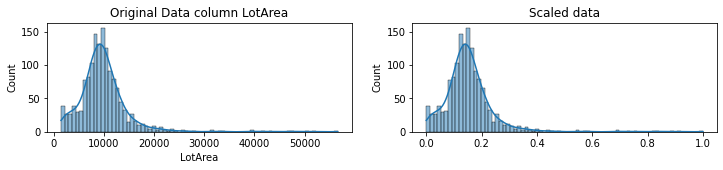

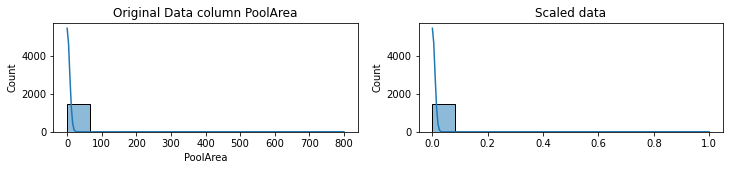

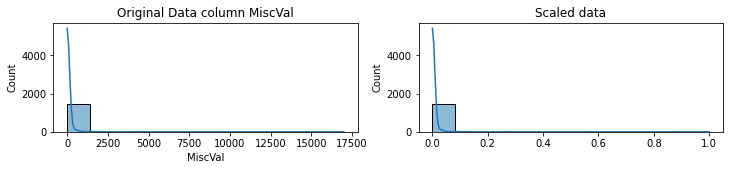

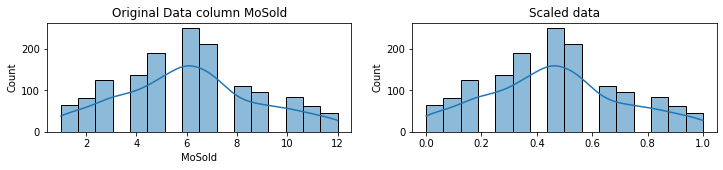

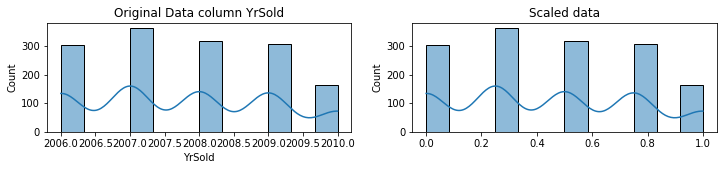

KeyError: ignored

In [242]:
#SCALING
import  pandas  as  pd 
#settings : 
pd.set_option ( 'display.max_rows' ,  1000 ) 
pd.set_option ( 'display.max_columns' ,  500 ) 
pd.set_option ( 'display.width' ,  1000 ) 
pd.set_option ( 'display.max_colwidth' ,  1000 )
import  numpy  as  np 
import  matplotlib.pyplot  as  plt 
import  seaborn  as  sns
import missingno as msno 
import datatable as dt # pip install datatable    

from scipy import stats
from sklearn.preprocessing import minmax_scale
def plot_scale_and_original(original_data, column_to_plot)->None:
    """Plot the column of dataframe scaling and original
    """
    # mix-max scale the data between 0 and 1
    scaled_data = minmax_scale(original_data[column_to_plot])
    #____________plot started here_________________
    fig, ax = plt.subplots(1, 2, figsize=(12, 2))
    sns.histplot(original_data[column_to_plot], ax=ax[0], kde=True, legend=False)
    ax[0].set_title(f"Original Data column {column_to_plot}")
    sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
    ax[1].set_title("Scaled data")
    plt.show()

data = pd.read_csv("/content/drive/MyDrive/database_house/test.csv")
plot_scale_and_original(data, 'LotFrontage')
plot_scale_and_original(data, 'LotArea')
plot_scale_and_original(data, 'PoolArea')
plot_scale_and_original(data, 'MiscVal')
plot_scale_and_original(data, 'MoSold')
plot_scale_and_original(data, 'YrSold')
plot_scale_and_original(data, 'SalePrice')

In [243]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Read the data
data_train = pd.read_csv("/content/drive/MyDrive/database_house/train.csv", index_col='Id')
data_test = pd.read_csv("/content/drive/MyDrive/database_house/test.csv", index_col='Id')

# Remove rows with missing target, separate target from predictors
data_train.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = data_train.SalePrice
data_train.drop(['SalePrice'], axis=1, inplace=True)

# Break off validation set from training data
data_train_full, data_valid_full, y_train, y_valid = train_test_split(data_train, y, random_state=1)

# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in data_train.columns if
                    data_train[cname].nunique() < 10 and data_train[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in data_train.columns if 
                data_train[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = data_train_full[my_cols].copy()
X_valid = data_valid_full[my_cols].copy()
X_test = data_test[my_cols].copy()
X = data_train[my_cols].copy()

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define model
model = LinearRegression()

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                              ('model', model)])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

print('MAE:', mean_absolute_error(y_valid, preds))

# Preprocessing of test data, fit model 
preds_test = my_pipeline.predict(X_test)

# Save predictions in format used for competition scoring
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)

MAE: 19268.014637320168


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [244]:
# Save test predictions to file
preds_test = my_pipeline.predict(X_test)
output = pd.DataFrame({'Id': X_test.index, 'SalePrice': preds_test})
output.to_csv('/content/drive/MyDrive/database_house/pipelines_submission.csv', index=False)
print("saved!")

saved!
